# COMPASS Collaboration data visualization
## Transverse-momentum-dependent Multiplicities of Charged Hadrons
### Penn State Berks PHYS_296 Fall 2018 
#### * Alexey  Prokudin*
##### Based on https://kite.com/blog/python/data-analysis-visualization-python

Our requirements include the pandas, numpy, seaborn, and matplotlib python packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Let’s analyze the dataset and take a closer look at its content. The aim here is to find details like the number of columns and other metadata which will help us to gauge size and other properties such as the range of values in the columns of the dataset.

In [2]:
compass_data = pd.read_excel("../database/sidis/expdata/5001.xlsx")
compass_data.head()

,Ebeam,x,Q2,y,z,pT,pT2,obs,value,stat_u,sys_u,target,hadron,col,F2,yp,yh,W2
0,160,0.157,20.0,0.439,0.2,0.300000,0.09,M_Compass,6.2719,0.3126,0.1051,deuteron,pi+,compass,0.64392,3.414464,-0.998970,108.268379
1,160,0.157,20.0,0.439,0.2,0.331662,0.11,M_Compass,6.2175,0.3135,0.1047,deuteron,pi+,compass,0.64392,3.414464,-0.914156,108.268379
2,160,0.157,20.0,0.439,0.2,0.360555,0.13,M_Compass,5.0537,0.2711,0.1070,deuteron,pi+,compass,0.64392,3.414464,-0.841657,108.268379
3,160,0.157,20.0,0.439,0.2,0.400000,0.16,M_Compass,4.8854,0.2244,0.1067,deuteron,pi+,compass,0.64392,3.414464,-0.749458,108.268379
4,160,0.157,20.0,0.439,0.2,0.424264,0.18,M_Compass,4.1757,0.2275,0.1101,deuteron,pi+,compass,0.64392,3.414464,-0.696253,108.268379


The describe function returns a pandas series type that provides descriptive statistics which summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. The three main numerical measures for the center of a distribution are the mode, mean(µ), and the median (M). The mode is the most frequently occurring value. The mean is the average value, while the median is the middle value.

In [3]:
compass_data.describe(include='all')

,Ebeam,x,Q2,y,z,pT,pT2,obs,value,stat_u,sys_u,target,hadron,col,F2,yp,yh,W2
count,2332.0,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332,2332.000000,2332.000000,2332.000000,2332,2332,2332,2332.000000,2332.000000,2332.000000,2332.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M_Compass,NaN,NaN,NaN,deuteron,pi+,compass,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2332,NaN,NaN,NaN,2332,2332,2332,NaN,NaN,NaN,NaN
mean,160.0,0.064251,5.260849,0.388407,0.381647,0.822979,0.855768,NaN,0.718448,0.024896,0.105140,NaN,NaN,NaN,0.531209,4.007365,0.090350,109.933967
std,0.0,0.073380,5.345043,0.208262,0.142018,0.422552,0.781743,NaN,1.102031,0.039244,0.045548,NaN,NaN,NaN,0.302348,0.749949,0.800303,63.184129
min,160.0,0.006200,1.300000,0.122000,0.200000,0.173205,0.030000,NaN,0.000300,0.000100,0.067100,NaN,NaN,NaN,0.000000,2.636937,-2.198861,33.118838
25%,160.0,0.016200,1.800000,0.213000,0.300000,0.458258,0.210000,NaN,0.040800,0.002900,0.078600,NaN,NaN,NaN,0.449340,3.415717,-0.462244,54.750968
50%,160.0,0.038900,2.500000,0.363000,0.400000,0.748331,0.560000,NaN,0.230950,0.010800,0.089300,NaN,NaN,NaN,0.679420,3.969957,0.118654,101.766261
75%,160.0,0.075200,8.300000,0.534000,0.400000,1.144552,1.310000,NaN,0.902825,0.029300,0.111800,NaN,NaN,NaN,0.721880,4.609495,0.670014,154.472152


Next, we address some of the fundamental questions:

The number of entries in the dataset:

In [23]:
print(compass_data.shape)

(2332, 18)


Count of all data points.

In [11]:
print(compass_data['obs'].count())

2332


Count of the data points for positively charged pions.

In [12]:
print(compass_data[compass_data['hadron']=='pi+'].count())

Ebeam     2332
x         2332
Q2        2332
y         2332
z         2332
pT        2332
pT2       2332
obs       2332
value     2332
stat_u    2332
sys_u     2332
target    2332
hadron    2332
col       2332
F2        2332
yp        2332
yh        2332
W2        2332
dtype: int64


Now let us see how many data points are for positively charged pions. We then Split the dataset into two parts based on the flag type. To do this, we must pass the required condition in square brackets to the sales_data object, which examines all the entries with the condition mentioned and creates a new object with only the required values.

In [13]:
compass_data_pip = compass_data[compass_data["hadron"]=="pi+"]
print(compass_data_pip)

      Ebeam       x    Q2      y    z        pT   pT2        obs   value  \
0       160  0.1570  20.0  0.439  0.2  0.300000  0.09  M_Compass  6.2719   
1       160  0.1570  20.0  0.439  0.2  0.331662  0.11  M_Compass  6.2175   
2       160  0.1570  20.0  0.439  0.2  0.360555  0.13  M_Compass  5.0537   
3       160  0.1570  20.0  0.439  0.2  0.400000  0.16  M_Compass  4.8854   
4       160  0.1570  20.0  0.439  0.2  0.424264  0.18  M_Compass  4.1757   
5       160  0.1570  20.0  0.439  0.2  0.458258  0.21  M_Compass  4.0316   
6       160  0.1570  20.0  0.439  0.2  0.500000  0.25  M_Compass  3.2015   
7       160  0.1570  20.0  0.439  0.2  0.538516  0.29  M_Compass  2.6976   
8       160  0.1570  20.0  0.439  0.2  0.565685  0.32  M_Compass  2.2901   
9       160  0.1570  20.0  0.439  0.2  0.616441  0.38  M_Compass  2.0620   
10      160  0.1570  20.0  0.439  0.2  0.655744  0.43  M_Compass  1.5304   
11      160  0.1570  20.0  0.439  0.2  0.700000  0.49  M_Compass  1.1934   
12      160 

Let us add a new column qT = pT/z

In [14]:
compass_data_pip['qT'] = compass_data_pip['pT']/compass_data_pip['z']

The data associated with each attribute includes a long list of values (both numeric and not), and having these values as a long series is not particularly useful yet – they don’t provide any standalone insight. In order to convert the raw data into information we can actually use, we need to summarize and then examine the variable’s distribution.

The univariate distribution plots are graphs where we plot the histograms along with the estimated probability density function over the data. It’s one of the simplest techniques where we consider a single variable and observe its spread and statical properties. The univariate analysis for numerical and categorical attributes are different.

For categorical columns we plot histograms, we use the value_count() and plot.bar() functions to draw a bar plot, which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values. In this case, we have two type of marketing types S and D. The bar plot shows comparisons among these discrete categories, with the x-axis showing the specific categories and the y-axis the measured value.

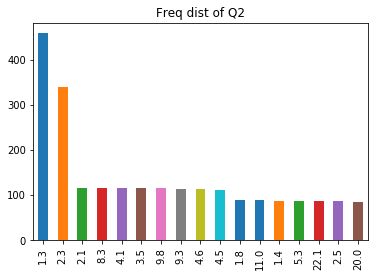

In [16]:
compass_data['Q2'].value_counts().plot.bar(title="Freq dist of Q2")

Below is the code to plot the univariate distribution of the numerical columns which contains the histograms and the estimated PDF. We use displot of the seaborn library to plot this graph:

/anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/anaconda2/lib/python2.7/site-packages/

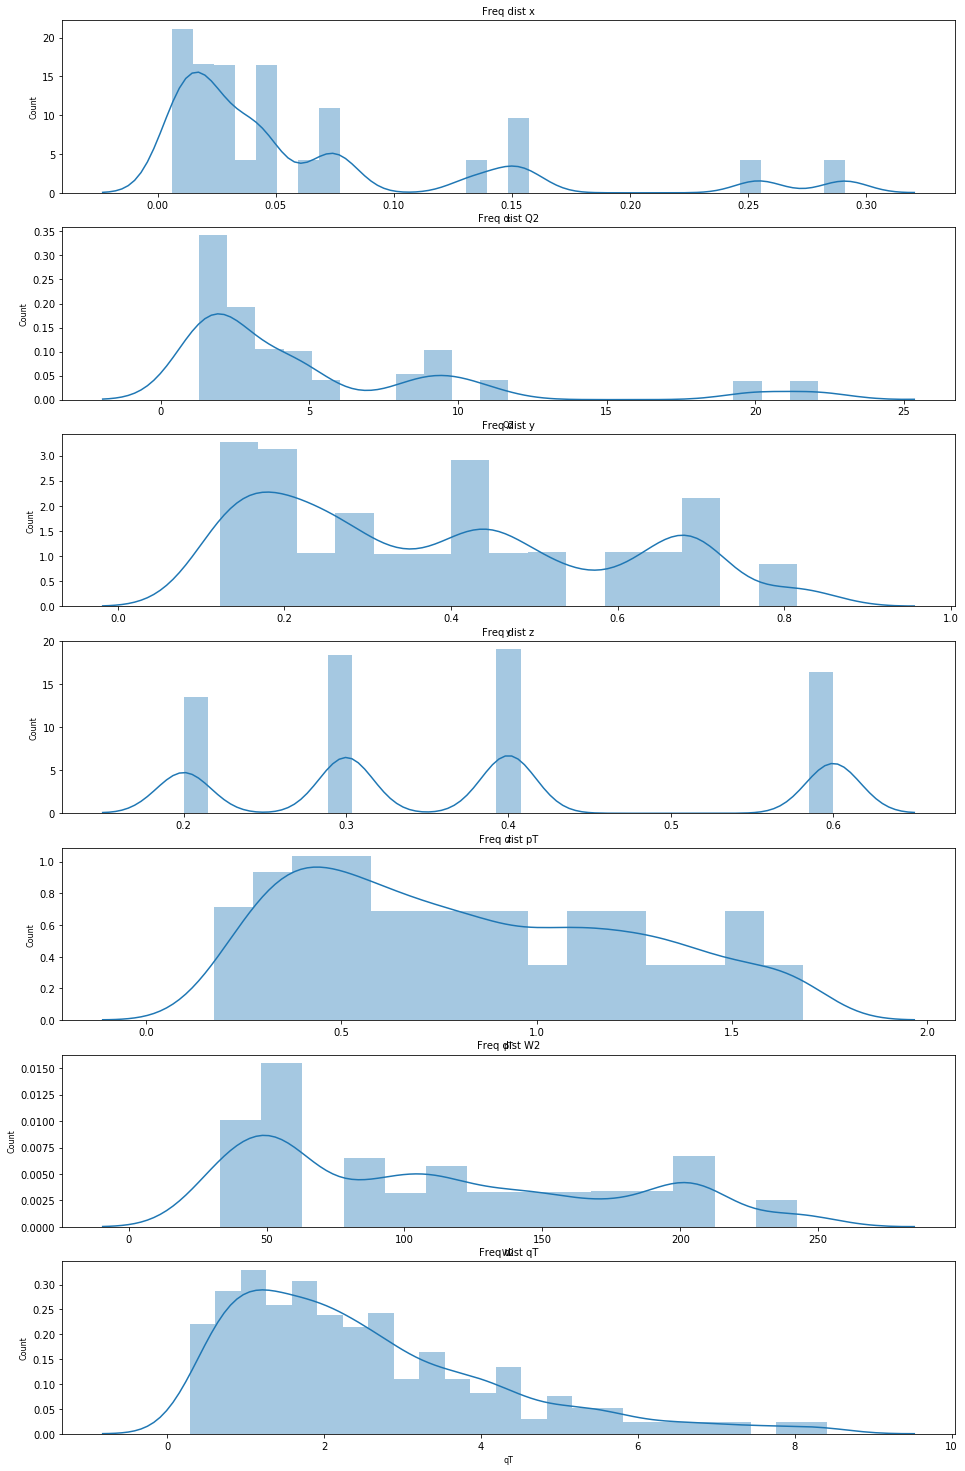

In [17]:
col_names = ['x','Q2', 'y', 'z', 'pT', 'W2', 'qT']

fig, ax = plt.subplots(len(col_names), figsize=(16,26))

for i, col_val in enumerate(col_names):

    sns.distplot(compass_data_pip[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot, and we use the pairplot() function of the seaborn package to plot the bivariate distributions.

We often look out for scatter plots that follow a clear linear pattern with an either increasing or decreasing slope so that we can draw conclusions

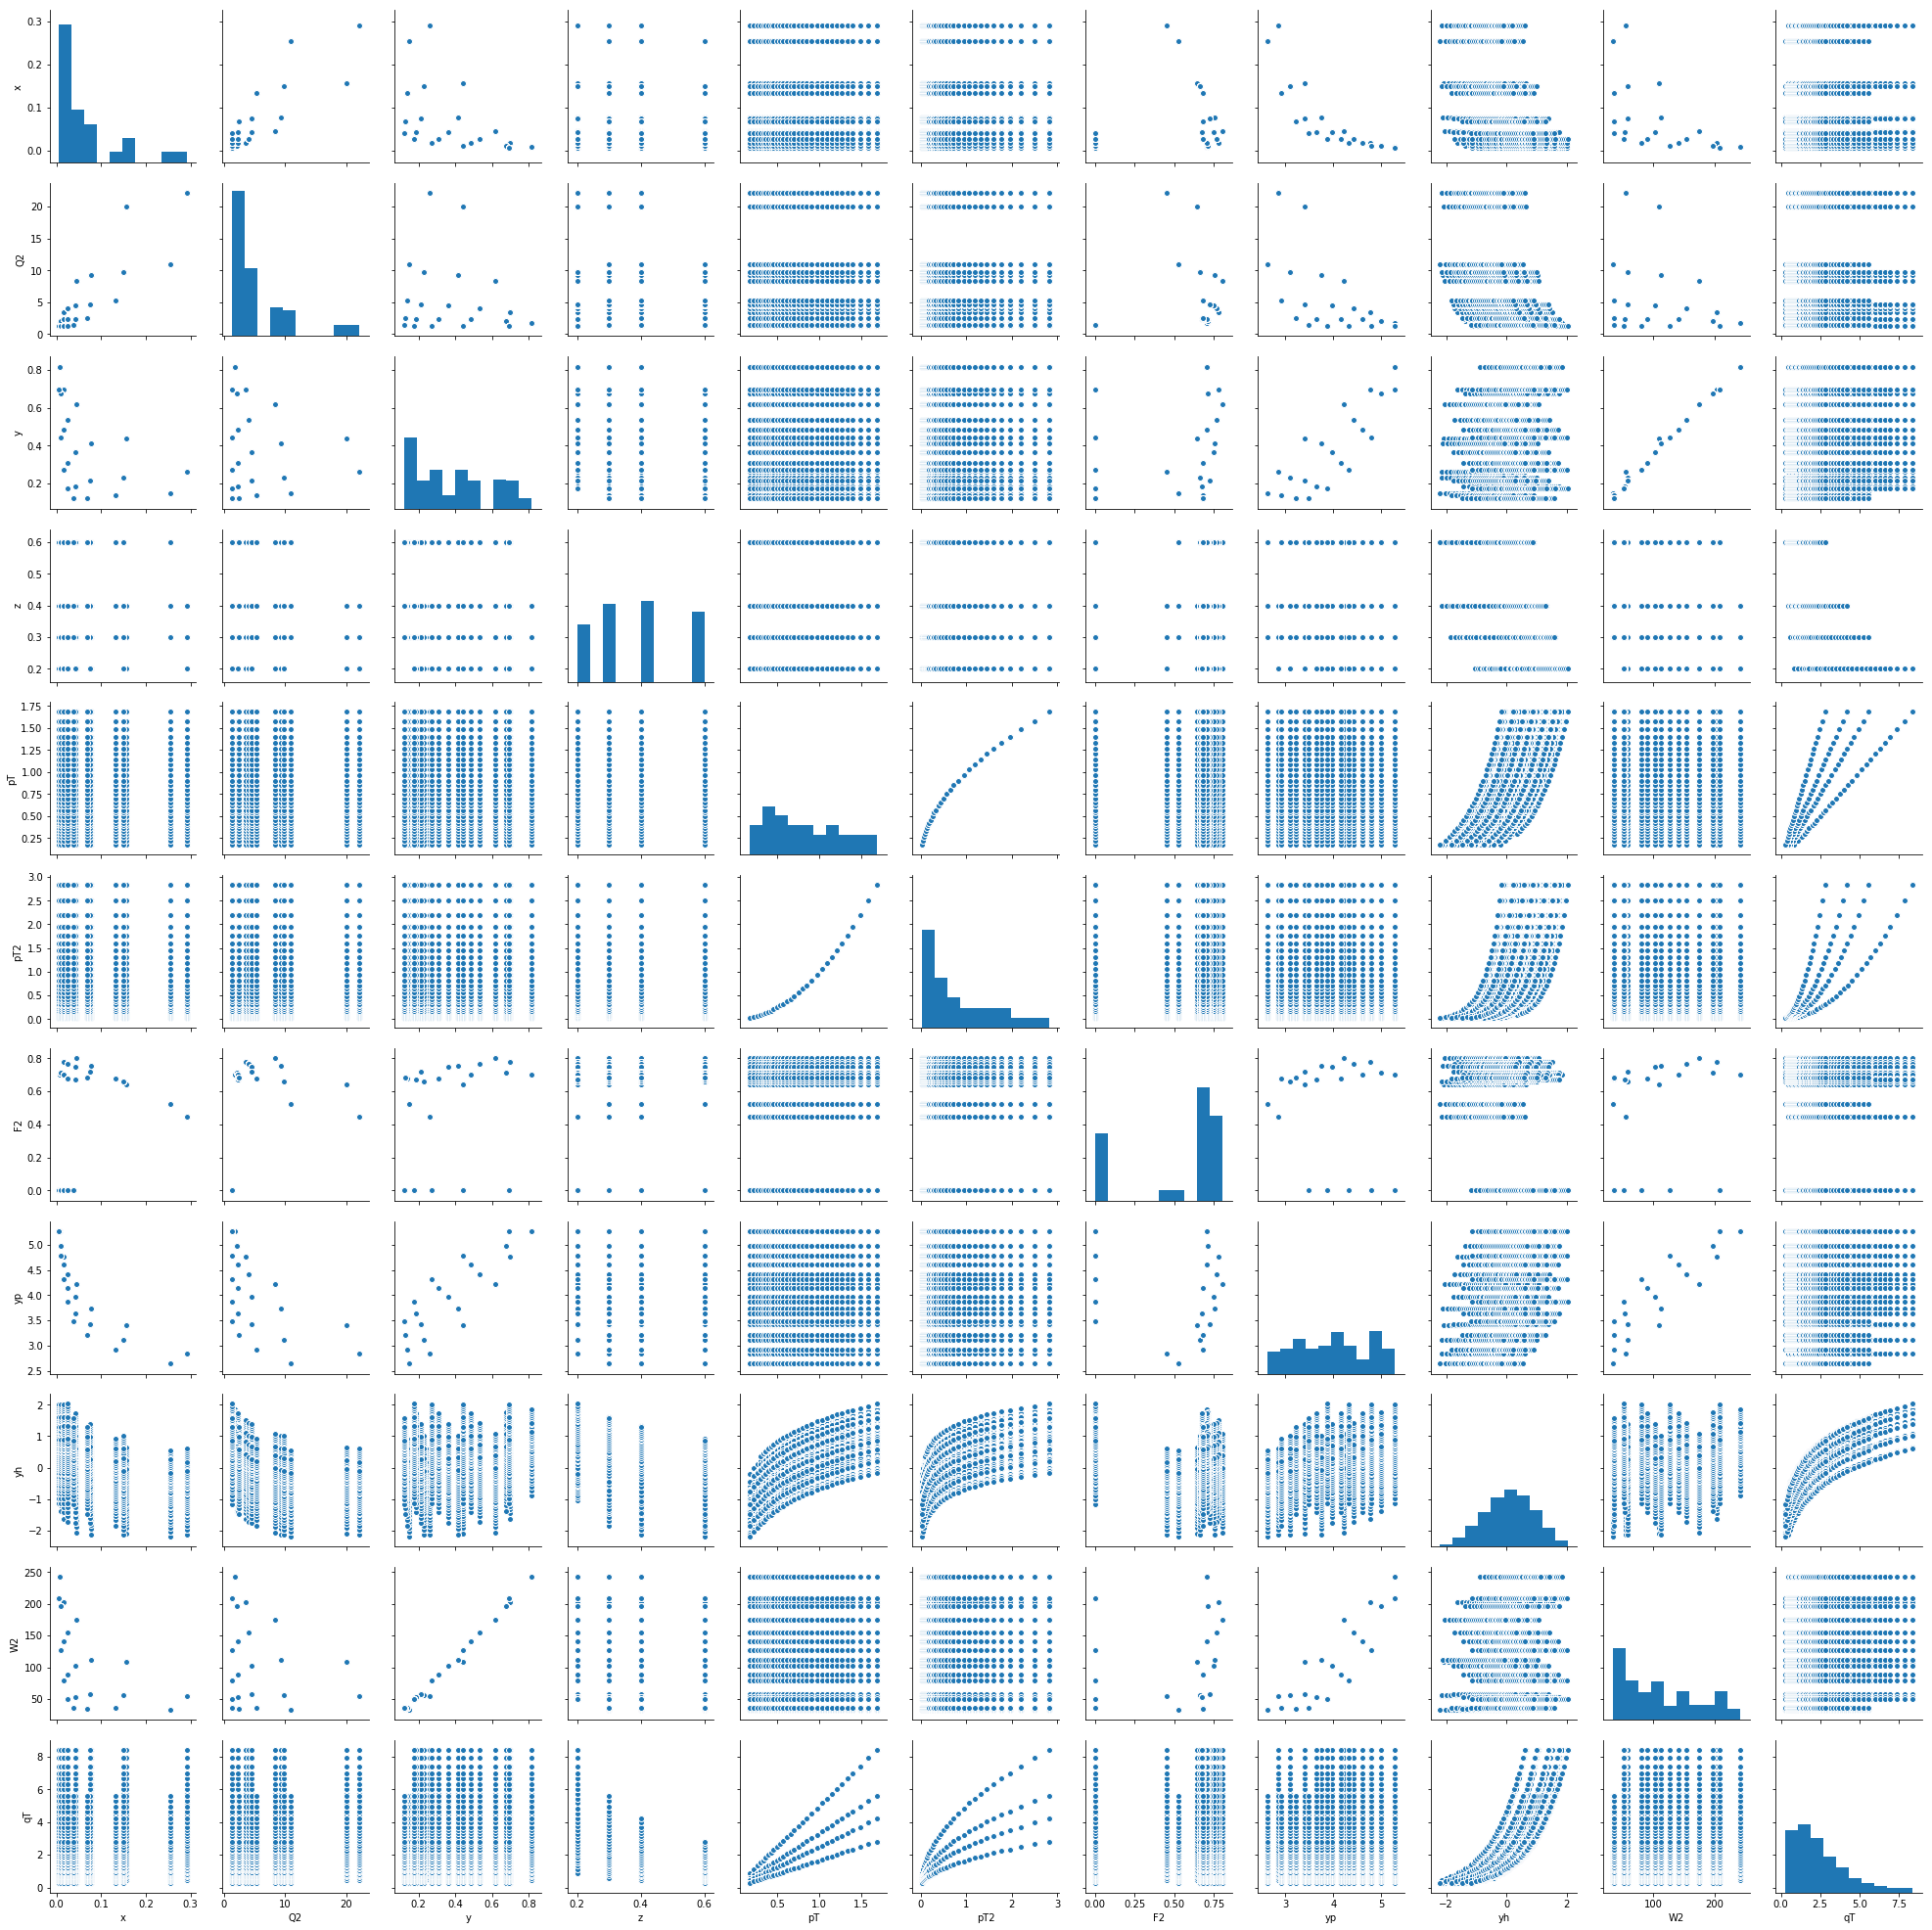

In [18]:
compass_data_pip_filtered = compass_data_pip.drop([
      'Ebeam','obs','value','stat_u','sys_u','target','hadron','col'
], axis=1)
sns.pairplot(compass_data_pip_filtered)

A correlation matrix is a table showing the value of the correlation coefficient (Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. ) between sets of variables. Each attribute of the dataset is compared with the other attributes to find out the correlation coefficient. This analysis allows you to see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance of the dataset thus we can further analyze them to understand which attribute among the pairs are most significant for building the model.

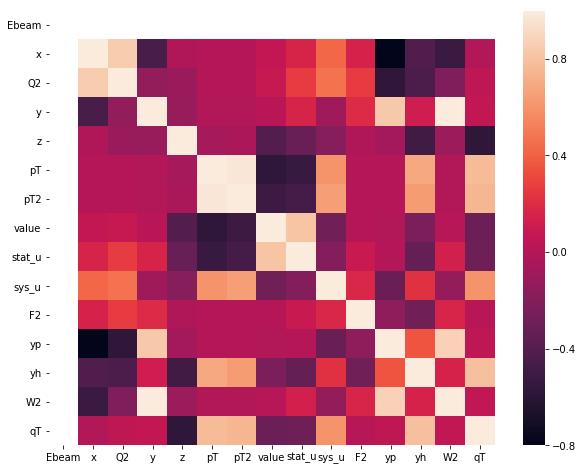

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
corr = compass_data_pip.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)